Maquina Virtual

In [ ]:
# find information about my Linux installation
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.6 LTS
Release:	18.04
Codename:	bionic


In [ ]:
# Gather information about your CPU infrastructure
!lscpu | grep -E '^Model name|^Thread|^Core|^Socket|^CPU\('

CPU(s):              2
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz


In [ ]:
# show the space you have available on your virtual computer
!free -m -h

              total        used        free      shared  buff/cache   available
Mem:            12G        792M        9.4G        1.2M        2.5G         11G
Swap:            0B          0B          0B


In [ ]:
#informs about the space storage in our system 
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   23G   86G  21% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
tmpfs           6.4G   32K  6.4G   1% /var/colab
/dev/sda1        41G   24G   17G  59% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
# list information about block devices 
!lsblk -d -o name,rota

NAME  ROTA
loop0    0
sda      0


Instalación de Requerimientos

In [ ]:
# installs our Java SE 11 Platform Specification with the apt-get method  
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
# installs apache spark from the web with the command wget
!wget -q https://archive.apache.org/dist/spark/spark-3.2.2/spark-3.2.2-bin-hadoop3.2.tgz
#used to get a .tar archive of the spark 
!tar xf spark-3.2.2-bin-hadoop3.2.tgz
# uses pip to install the findspark library on python
!pip -q install findspark

In [ ]:
# make sure what version on java we got installed 
! java -version

openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [ ]:
# import os and assign the environment variables of JAVA HOME & SPARK HOME
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.2-bin-hadoop3.2"

In [ ]:
# install the pyspark library to manage spark on python 
!pip -q install pyspark

     |████████████████████████████████| 281.4 MB 45 kB/s 
     |████████████████████████████████| 199 kB 63.3 MB/s 


In [ ]:
# geopandas work with geoespacial data easier 
# attrs releives you from writing object protocols (bunker methods)
# shapely for manipulation and analysis of planar geometric objects
# rtree is a python wrapper for spatial indexing 
# apache sedona is a cluster computing system for processing large-scale spatial data
!pip -q install geopandas attrs shapely rtree apache-sedona[spark]

     |████████████████████████████████| 1.0 MB 16.7 MB/s 
     |████████████████████████████████| 1.0 MB 58.8 MB/s 
     |████████████████████████████████| 67 kB 5.9 MB/s 
     |████████████████████████████████| 6.3 MB 57.7 MB/s 
     |████████████████████████████████| 16.7 MB 37.4 MB/s 


Descarga de Bases de Datos Listas para el Análisis

In [ ]:
#Descarga de Bases de Datos SCINCE 2020 y DENUE Mayo 2022
# Get SCINCE database
!gdown 1fLXusjBYsIxjvWolnmeaZXxKY4kaCjfL
# Get DENUE database
!gdown 1dWUkR4gxf8ngaF9y4mfn8OJmsIbAYYgP

Downloading...
From: https://drive.google.com/uc?id=1fLXusjBYsIxjvWolnmeaZXxKY4kaCjfL
To: /content/SCINCE_Parquets.zip
100% 1.07G/1.07G [00:12<00:00, 84.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dWUkR4gxf8ngaF9y4mfn8OJmsIbAYYgP
To: /content/DENUE_Parquets.zip
100% 486M/486M [00:05<00:00, 93.1MB/s]


Descompactar los Datos

In [ ]:
!ls /content/*.zip

/content/DENUE_Parquets.zip  /content/SCINCE_Parquets.zip


In [ ]:
!unzip /content/DENUE_Parquets.zip -d /content/DENUE_Parquets/ &> /dev/null

In [ ]:
!unzip /content/SCINCE_Parquets.zip -d /content/SCINCE_Parquets/ &> /dev/null

In [ ]:
!ls /content/DENUE_Parquets

01.parquet  07.parquet	13.parquet    18.parquet  24.parquet  30.parquet
02.parquet  08.parquet	14.parquet    19.parquet  25.parquet  31.parquet
03.parquet  09.parquet	15_1.parquet  20.parquet  26.parquet  32.parquet
04.parquet  10.parquet	15_2.parquet  21.parquet  27.parquet
05.parquet  11.parquet	16.parquet    22.parquet  28.parquet
06.parquet  12.parquet	17.parquet    23.parquet  29.parquet


In [ ]:
!ls /content/SCINCE_Parquets/SCINCE_Parquets

01_AGS.parquet	 09_CDMX.parquet  17_MOR.parquet    25_SIN.parquet
02_BC.parquet	 10_DGO.parquet   18_NAY.parquet    26_SON.parquet
03_BCS.parquet	 11_GTO.parquet   19_NL.parquet     27_TAB.parquet
04_CAMP.parquet  12_GRO.parquet   20_OAX.parquet    28_TAMS.parquet
05_COAH.parquet  13_HGO.parquet   21_PUE.parquet    29_TLAX.parquet
06_COL.parquet	 14_JAL.parquet   22_QRO.parquet    30_VER.parquet
07_CHIS.parquet  15_MEX.parquet   23_Q_ROO.parquet  31_YUC.parquet
08_CHIH.parquet  16_MICH.parquet  24_SLP.parquet    32_ZAC.parquet


Inicio de Apache Spark y Apache Sedona

In [ ]:
# import the necessary libraries 
import findspark
findspark.init()
import shapely
import pandas as pd 
import geopandas as gpd
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark import SparkConf
from sedona.register import SedonaRegistrator
from sedona.utils import SedonaKryoRegistrator, KryoSerializer
spark = SparkSession. \
builder. \
appName('GeoBigData'). \
config("spark.serializer", KryoSerializer.getName). \
config("spark.executor.memory", "5g"). \
config("spark.driver.memory", "10g"). \
config('spark.driver.maxResultSize', '5g'). \
config("spark.kryo.registrator", SedonaKryoRegistrator.getName). \
config('spark.jars.packages',
           'org.apache.sedona:sedona-python-adapter-3.0_2.12:1.2.0-incubating,'
           'org.datasyslab:geotools-wrapper:1.1.0-25.2'). \
getOrCreate()
SedonaRegistrator.registerAll(spark)

True

Leer Datos

In [ ]:
BD_MANZANAS = spark.read.parquet(f"/content/SCINCE_Parquets/SCINCE_Parquets/19_NL.parquet")
# Nuestras variables 
# VIV17_R Porcentaje de viviendas que tiene agua entubada  
# VIV18_R Porcentaje de viviendas que NO tienen agua entubada 
# VIV23_R Porcentaje de viviendas que tienen drenaje 
# VIV24_R Porcentaje de viviendas que NO tienen drenaje 
# VIV25_R Porcentaje de viviendas que tienen drenaje, red electrica y agua entubada. 

BD_MANZANAS_VVVVV = BD_MANZANAS.select('CVEGEO', 'VIV17_R', 'VIV18_R', 'VIV23_R', 'VIV24_R', 'VIV25_R', 'geometry')
BD_MANZANAS_VVVVV.cache()
BD_MANZANAS_VVVVV.printSchema()
BD_MANZANAS_VVVVV.show()

root
 |-- CVEGEO: string (nullable = true)
 |-- VIV17_R: double (nullable = true)
 |-- VIV18_R: double (nullable = true)
 |-- VIV23_R: double (nullable = true)
 |-- VIV24_R: double (nullable = true)
 |-- VIV25_R: double (nullable = true)
 |-- geometry: geometry (nullable = true)

+----------------+-------+-------+-------+-------+-------+--------------------+
|          CVEGEO|VIV17_R|VIV18_R|VIV23_R|VIV24_R|VIV25_R|            geometry|
+----------------+-------+-------+-------+-------+-------+--------------------+
|1900100010021003|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2660122...|
|1900100010021004|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659382...|
|1900100010021009|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659967...|
|1900100010021010|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2660118...|
|1900100010021012|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659492...|
|1900100010021014|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659889...|

In [ ]:
BD_MANZANAS_VVVVV.createOrReplaceTempView("manzanas")

In [ ]:
BD_MZA_VVVVV_CORREGIDO = spark.sql("""select 
                                  CVEGEO,
                                  if( (isnull(VIV17_R) or VIV17_R < 0 ), 0, VIV17_R) as VIV17_R, 
                                  if( (isnull(VIV18_R) or VIV18_R < 0 ), 0, VIV18_R) as VIV18_R,
                                  if( (isnull(VIV23_R) or VIV23_R < 0 ), 0, VIV23_R) as VIV23_R,
                                  if( (isnull(VIV24_R) or VIV24_R < 0 ), 0, VIV24_R) as VIV24_R,
                                  if( (isnull(VIV25_R) or VIV25_R < 0 ), 0, VIV25_R) as VIV25_R,                                  
                                  geometry
                             from manzanas """)

BD_MZA_VVVVV_CORREGIDO.cache()
BD_MZA_VVVVV_CORREGIDO.show()

+----------------+-------+-------+-------+-------+-------+--------------------+
|          CVEGEO|VIV17_R|VIV18_R|VIV23_R|VIV24_R|VIV25_R|            geometry|
+----------------+-------+-------+-------+-------+-------+--------------------+
|1900100010021003|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2660122...|
|1900100010021004|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659382...|
|1900100010021009|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659967...|
|1900100010021010|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2660118...|
|1900100010021012|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659492...|
|1900100010021014|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659889...|
|1900100010021015|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659985...|
|1900100010021016|    0.0|    0.0|    0.0|    0.0|    0.0|POLYGON ((2659648...|
|1900100010021019|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659661...|
|1900100010021024|  100.0|    0.0|  100.

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

vecAssembler = VectorAssembler(inputCols=["VIV17_R", "VIV18_R", "VIV23_R", "VIV24_R", "VIV25_R"], outputCol="features")
BD_MZA_VVVVV_CORREGIDO_VEC = vecAssembler.transform(BD_MZA_VVVVV_CORREGIDO)
BD_MZA_VVVVV_CORREGIDO_VEC.cache()
BD_MZA_VVVVV_CORREGIDO_VEC.show()

+----------------+-------+-------+-------+-------+-------+--------------------+--------------------+
|          CVEGEO|VIV17_R|VIV18_R|VIV23_R|VIV24_R|VIV25_R|            geometry|            features|
+----------------+-------+-------+-------+-------+-------+--------------------+--------------------+
|1900100010021003|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2660122...|[100.0,0.0,100.0,...|
|1900100010021004|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659382...|[100.0,0.0,100.0,...|
|1900100010021009|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659967...|[100.0,0.0,100.0,...|
|1900100010021010|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2660118...|[100.0,0.0,100.0,...|
|1900100010021012|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659492...|[100.0,0.0,100.0,...|
|1900100010021014|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659889...|[100.0,0.0,100.0,...|
|1900100010021015|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659985...|[100.0,0.0,1

In [ ]:
kmeans = KMeans(k=3, seed=1, maxIter=250) 
model = kmeans.fit(BD_MZA_VVVVV_CORREGIDO_VEC.select('features'))
transformed = model.transform(BD_MZA_VVVVV_CORREGIDO_VEC)
transformed.show()

+----------------+-------+-------+-------+-------+-------+--------------------+--------------------+----------+
|          CVEGEO|VIV17_R|VIV18_R|VIV23_R|VIV24_R|VIV25_R|            geometry|            features|prediction|
+----------------+-------+-------+-------+-------+-------+--------------------+--------------------+----------+
|1900100010021003|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2660122...|[100.0,0.0,100.0,...|         0|
|1900100010021004|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659382...|[100.0,0.0,100.0,...|         0|
|1900100010021009|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659967...|[100.0,0.0,100.0,...|         0|
|1900100010021010|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2660118...|[100.0,0.0,100.0,...|         0|
|1900100010021012|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659492...|[100.0,0.0,100.0,...|         0|
|1900100010021014|  100.0|    0.0|  100.0|    0.0|  100.0|POLYGON ((2659889...|[100.0,0.0,100.0,...|    

In [ ]:
transformed_df = transformed.toPandas()
transformed_df.head()

,CVEGEO,VIV17_R,VIV18_R,VIV23_R,VIV24_R,VIV25_R,geometry,features,prediction
0,1900100010021003,100.0,0.0,100.0,0.0,100.0,POLYGON ((2660122.713600002 1545140.4112000018...,"[100.0, 0.0, 100.0, 0.0, 100.0]",0
1,1900100010021004,100.0,0.0,100.0,0.0,100.0,POLYGON ((2659382.2437999994 1545032.092000000...,"[100.0, 0.0, 100.0, 0.0, 100.0]",0
2,1900100010021009,100.0,0.0,100.0,0.0,100.0,POLYGON ((2659967.5650999993 1545076.190099999...,"[100.0, 0.0, 100.0, 0.0, 100.0]",0
3,1900100010021010,100.0,0.0,100.0,0.0,100.0,POLYGON ((2660118.3082000017 1545008.925700001...,"[100.0, 0.0, 100.0, 0.0, 100.0]",0
4,1900100010021012,100.0,0.0,100.0,0.0,100.0,POLYGON ((2659492.5195000023 1545005.809500001...,"[100.0, 0.0, 100.0, 0.0, 100.0]",0


In [ ]:
transformed_df.to_csv("transformed.csv")

In [ ]:
import numpy as np
from scipy import stats

#VIV17_R estadisticos
viv17 = transformed_df["VIV17_R"]
mean_viv17 = np.average(viv17)
median_viv17 = np.median(viv17)
mode_viv17 = stats.mode(viv17)
sd_viv17 = np.std(viv17)
print("Promedio VIV17_R",mean_viv17)
print("Mediana VIV17_R", median_viv17)
print("Moda VIV17_R", mode_viv17)
print("Desviación estándar VIV17_R",sd_viv17)

Promedio VIV17_R 79.17777258263523
Mediana VIV17_R 100.0
Moda VIV17_R ModeResult(mode=array([100.]), count=array([58501]))
Desviación estándar VIV17_R 40.26508107944985


In [ ]:
#VIV18_R estadisticos
viv18 = transformed_df["VIV18_R"]
mean_viv18 = np.average(viv18)
median_viv18 = np.median(viv18)
mode_viv18 = stats.mode(viv18)
sd_viv18 = np.std(viv18)
print("Promedio VIV18_R",mean_viv18)
print("Mediana VIV18_R", median_viv18)
print("Moda VIV18_R", mode_viv18)
print("Desviación estándar VIV18_R",sd_viv18)

Promedio VIV18_R 0.15583609325280862
Mediana VIV18_R 0.0
Moda VIV18_R ModeResult(mode=array([0.]), count=array([76733]))
Desviación estándar VIV18_R 3.2545644391086945


In [ ]:
#VIV23_R estadisticos
viv23 = transformed_df["VIV23_R"]
mean_viv23 = np.average(viv23)
median_viv23 = np.median(viv23)
mode_viv23 = stats.mode(viv23)
sd_viv23 = np.std(viv23)
print("Promedio VIV23_R",mean_viv23)
print("Mediana VIV23_R", median_viv23)
print("Moda VIV23_R", mode_viv23)
print("Desviación estándar VIV23_R",sd_viv23)

Promedio VIV23_R 79.14974089226574
Mediana VIV23_R 100.0
Moda VIV23_R ModeResult(mode=array([100.]), count=array([58294]))
Desviación estándar VIV23_R 40.23050854203673


In [ ]:
#VIV24_R estadisticos
viv24 = transformed_df["VIV24_R"]
mean_viv24 = np.average(viv24)
median_viv24 = np.median(viv24)
mode_viv24 = stats.mode(viv24)
sd_viv24 = np.std(viv24)
print("Promedio VIV24_R",mean_viv24)
print("Mediana VIV24_R", median_viv24)
print("Moda VIV24_R", mode_viv24)
print("Desviación estándar VIV24_R",sd_viv24)

Promedio VIV24_R 0.11244236638742776
Mediana VIV24_R 0.0
Moda VIV24_R ModeResult(mode=array([0.]), count=array([76755]))
Desviación estándar VIV24_R 2.48085765827168


In [ ]:
#VIV25_R estadisticos
viv25 = transformed_df["VIV25_R"]
mean_viv25 = np.average(viv25)
median_viv25 = np.median(viv25)
mode_viv25 = stats.mode(viv25)
sd_viv25 = np.std(viv25)
print("Promedio VIV25_R",mean_viv25)
print("Mediana VIV25_R", median_viv25)
print("Moda VIV25_R", mode_viv25)
print("Desviación estándar VIV25_R",sd_viv25)

Promedio VIV25_R 78.80074550295475
Mediana VIV25_R 100.0
Moda VIV25_R ModeResult(mode=array([100.]), count=array([56372]))
Desviación estándar VIV25_R 40.30157200709878


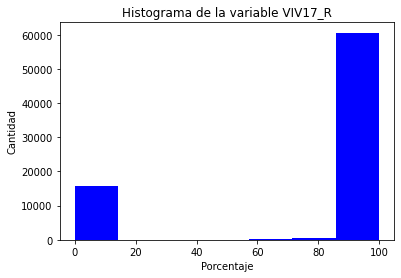

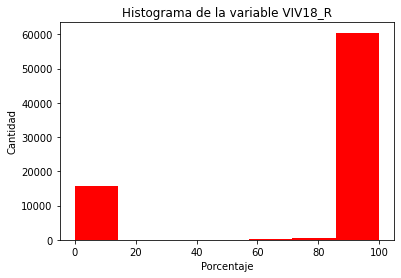

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histograma viv17
plt.hist(viv17, range = (0,100), bins = 7 , color = 'blue')
plt.title("Histograma de la variable VIV17_R")
plt.xlabel("Porcentaje")
plt.ylabel("Cantidad")
plt.show()
# Histograma viv18
plt.clf()
plt.hist(viv18, range = (0,100), bins = 7 , color = 'red')
plt.title("Histograma de la variable VIV18_R")
plt.xlabel("Porcentaje")
plt.ylabel("Cantidad")

plt.show()

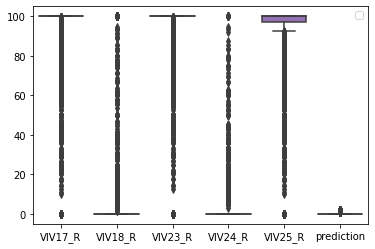

In [ ]:
sns.boxplot(data = transformed_df)
plt.legend()
plt.show()

In [ ]:
transformed.createOrReplaceTempView("result_kmeans")
clusters = spark.sql(""" select prediction, 
    mean(VIV17_R) as mean_agua_entubada, 
    mean(VIV18_R) as mean_no_agua_entubada,
    mean(VIV23_R) as mean_drenaje,
    mean(VIV24_R) as mean_no_drenaje,
    mean(VIV25_R) as mean_3_servicios,
    count(*) as conteo
from result_kmeans group by prediction order by mean_agua_entubada""")

clusters.show()

+----------+------------------+---------------------+--------------------+-------------------+--------------------+------+
|prediction|mean_agua_entubada|mean_no_agua_entubada|        mean_drenaje|    mean_no_drenaje|    mean_3_servicios|conteo|
+----------+------------------+---------------------+--------------------+-------------------+--------------------+------+
|         1|0.5886100876635751|  0.10243933426502351|0.026203786050057173|0.19903443018676154|0.026203786050057173| 15742|
|         2| 36.28899999999999|   29.932666666666677|   77.58933333333334| 7.1629999999999985|  28.476999999999997|   300|
|         0| 99.68565944252109| 0.023070234442931443|   99.59222679769643|0.05537709382639082|   99.39310288254852| 60953|
+----------+------------------+---------------------+--------------------+-------------------+--------------------+------+



In [ ]:
df_clusters = clusters.toPandas()

In [ ]:
df_clusters

,prediction,mean_agua_entubada,mean_no_agua_entubada,mean_drenaje,mean_no_drenaje,mean_3_servicios,conteo
0,1,0.588610,0.102439,0.026204,0.199034,0.026204,15742
1,2,36.289000,29.932667,77.589333,7.163000,28.477000,300
2,0,99.685659,0.023070,99.592227,0.055377,99.393103,60953


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

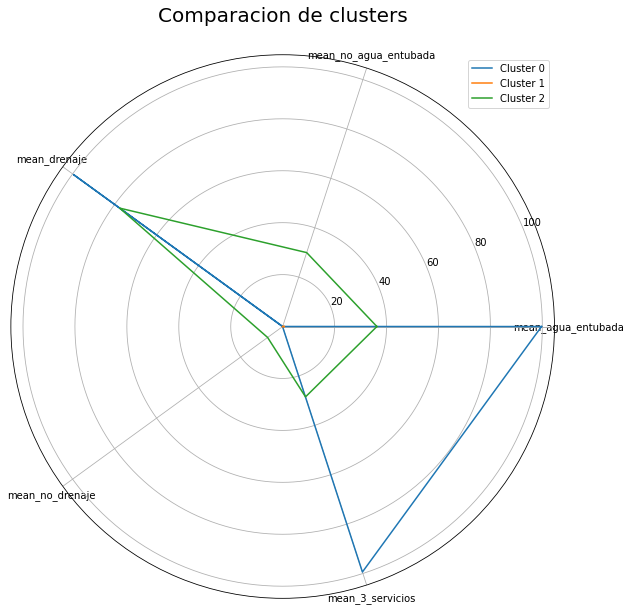

In [ ]:
categories = df_clusters.columns[1:-1].values
cluster_0 = df_clusters.where(df_clusters.prediction==0).dropna().values[0][1:-1]
cluster_1 = df_clusters.where(df_clusters.prediction==1).dropna().values[0][1:-1]
cluster_2 = df_clusters.where(df_clusters.prediction==2).dropna().values[0][1:-1]

cluster_0 = [*cluster_0,cluster_0[0]]
cluster_1 = [*cluster_1,cluster_1[0]]
cluster_2 = [*cluster_2,cluster_2[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(cluster_0))

plt.figure(figsize=(10, 10))
plt.subplot(polar=True)
plt.plot(label_loc, cluster_0, label='Cluster 0')
plt.plot(label_loc, cluster_1, label='Cluster 1')
plt.plot(label_loc, cluster_2, label='Cluster 2')
plt.title('Comparacion de clusters', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

In [ ]:
# Verde: Cluster 0
# Amarillo: Cluster 2
# Rojo: Cluster 1

Visualización de Datos

In [ ]:
df_manzanas = spark.sql("""select VIV17_R as agua_entubada,
                                  VIV18_R as agua_no_entubada,
                                  VIV23_R as drenaje,
                                  VIV24_R as no_drenaje,
                                  VIV25_R as 3_servicios,
                                  geometry,
                                  prediction 
                           from result_kmeans""").toPandas()
geopandas_df_grid = gpd.GeoDataFrame(df_manzanas, geometry="geometry")
geopandas_df_grid = geopandas_df_grid.set_crs('PROJCS["Mexico_ITRF2008_LCC",GEOGCS["Mexico_ITRF2008",DATUM["Mexico_ITRF2008",SPHEROID["GRS_1980",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP",AUTHORITY["EPSG","9802"]],PARAMETER["Central_Meridian",-102],PARAMETER["Latitude_Of_Origin",12],PARAMETER["False_Easting",2500000],PARAMETER["False_Northing",0],PARAMETER["Standard_Parallel_1",17.5],PARAMETER["Standard_Parallel_2",29.5],PARAMETER["Scale_Factor",1],UNIT["Meter",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","6372"]]')
geopandas_df_grid = geopandas_df_grid.to_crs("EPSG:4326")
#geopandas_df_grid.to_file("/content/drive/MyDrive/GeoBigDataNube2022/resultados/manzanas_kmeans.shp")

In [ ]:
import folium
import webbrowser

In [ ]:
def rank_colormap(gdf):
  if gdf['properties']['prediction'] is 0:
    return 'green'
  if gdf['properties']['prediction'] is 2:
    return 'yellow'
  if gdf['properties']['prediction'] is 1:
    return 'red'

In [ ]:
m = folium.Map(location=[25.6507071,-100.2866162], zoom_start=14)

folium.GeoJson(data = geopandas_df_grid, name="Estratos",style_function = lambda feature: {
   'fillColor': rank_colormap(feature),
   'color': rank_colormap(feature),
   'weight': '0.5',
   'fill': True,
   'fill_opacity': '1'
}).add_to(m)

In [ ]:
# Despliegue del Mapa
m.save("map.html")
webbrowser.open("map.html")

False

Mapa de Densidad de Farmacias

In [ ]:
BD_DENUE = spark.read.parquet(f"/content/DENUE_Parquets/19.parquet")
BD_DENUE.createOrReplaceTempView("denue")
BD_DENUE.cache()
BD_DENUE.count()

186092

In [ ]:
Influencia_Agua = spark.sql("""select 
                                  CVEGEO,
                                  VIV17_R as agua_entubada,
                                  VIV18_R as agua_no_entubada,
                                  VIV23_R as drenaje,
                                  VIV24_R as no_drenaje,
                                  VIV25_R as servicios_3,
                                  result_kmeans.geometry,
                                  prediction,
                                  count(*) as n_agua
                           from result_kmeans,
                                denue
                            where denue.codigo_act in ('221312') and
                                  ST_Intersects(result_kmeans.geometry , ST_Buffer(denue.geometry,1500)) 
                            group by CVEGEO, agua_entubada, agua_no_entubada, drenaje, no_drenaje, servicios_3, result_kmeans.geometry,prediction """).toPandas()

Influencia_Agua_SHP = gpd.GeoDataFrame(Influencia_Agua, geometry="geometry")
Influencia_Agua_SHP = Influencia_Agua_SHP.set_crs('PROJCS["Mexico_ITRF2008_LCC",GEOGCS["Mexico_ITRF2008",DATUM["Mexico_ITRF2008",SPHEROID["GRS_1980",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP",AUTHORITY["EPSG","9802"]],PARAMETER["Central_Meridian",-102],PARAMETER["Latitude_Of_Origin",12],PARAMETER["False_Easting",2500000],PARAMETER["False_Northing",0],PARAMETER["Standard_Parallel_1",17.5],PARAMETER["Standard_Parallel_2",29.5],PARAMETER["Scale_Factor",1],UNIT["Meter",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","6372"]]')
Influencia_Agua_SHP = Influencia_Agua_SHP.to_crs("EPSG:4326")


In [ ]:
Influencia_Agua_SHP

,CVEGEO,agua_entubada,agua_no_entubada,drenaje,no_drenaje,servicios_3,geometry,prediction,n_farma
0,1902900010060017,100.0,0.0,100.0,0.0,100.0,"POLYGON ((-99.67391 24.88797, -99.67398 24.887...",0,1
1,1900900010621043,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-99.99811 25.57883, -99.99808 25.578...",1,1
2,1900900010369023,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-99.98334 25.58664, -99.98333 25.586...",1,1
3,190090001034A003,100.0,0.0,100.0,0.0,100.0,"POLYGON ((-99.98162 25.59045, -99.98195 25.590...",0,1
4,190090001034A007,100.0,0.0,100.0,0.0,100.0,"POLYGON ((-99.98041 25.59014, -99.98075 25.590...",0,1
...,...,...,...,...,...,...,...,...,...
22247,1900200010230005,100.0,0.0,100.0,0.0,100.0,"POLYGON ((-99.53892 26.31261, -99.53980 26.312...",0,1
22248,1900200010211025,75.0,0.0,100.0,0.0,75.0,"POLYGON ((-99.53878 26.31348, -99.53967 26.313...",0,1
22249,1900600010526011,100.0,0.0,100.0,0.0,100.0,"POLYGON ((-100.18028 25.78143, -100.18058 25.7...",0,1
22250,1900604030193020,100.0,0.0,100.0,0.0,100.0,"POLYGON ((-100.17284 25.79973, -100.17328 25.7...",0,1


In [ ]:
m2 = folium.Map(location=[25.6507071,-100.2866162], zoom_start=13)

In [ ]:
folium.Choropleth(
    geo_data=Influencia_Agua_SHP.to_json(drop_id=True),
    name="Aguas",
    data=Influencia_Agua_SHP,
    columns=["CVEGEO", "n_agua"],
    key_on="feature.properties.CVEGEO",
    fill_color="Spectral",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Compañias de Agua",
).add_to(m2)


In [ ]:
m2.save("map_2.html")
webbrowser.open("map_2.html")

False

FIN.